# DD2437 lab1  2020.01


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random, math

In [2]:
## data generation 

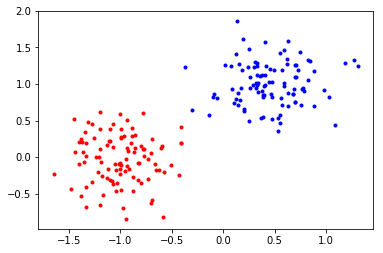

In [3]:
np.random.seed(1000)

mA = [0.5, 1.0]
mB = [-1, 0]

sigmaA = 0.3
sigmaB = 0.3

classA = np.concatenate(
(np.random.randn(50, 2)*sigmaA + mA,
 np.random.randn(50, 2)*sigmaA + mA))

classB = np.concatenate(
(np.random.randn(50, 2)*sigmaB + mB,
 np.random.randn(50, 2)*sigmaB + mB))

inputs = np.concatenate((classA, classB))

targets = np.concatenate((np.ones(classA.shape[0],dtype = int), -np.ones(classB.shape[0],dtype = int)))

N = inputs.shape[0]

permute = list(range(N))

random.shuffle(permute)

inputs = inputs[permute, :]

targets = targets[permute]

plt.plot([p[0] for p in classA], [p[1] for p in classA], 'b.')
plt.plot([p[0] for p in classB], [p[1] for p in classB], 'r.')

In [4]:
class Perceptron(object):

    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] +=  update * xi
                self.w_[0] +=  update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [5]:
class Perceptron_MSE(object):

    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                e = target - self.predict(xi)
                update = self.eta * e
                self.w_[1:] +=  update * xi
                self.w_[0] +=  update
                errors += (e**2)
            self.errors_.append(errors)
        return self
    

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

Weights: [0.         0.00535585 0.00317844]


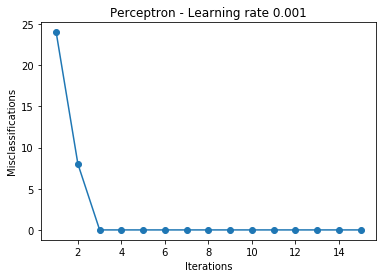

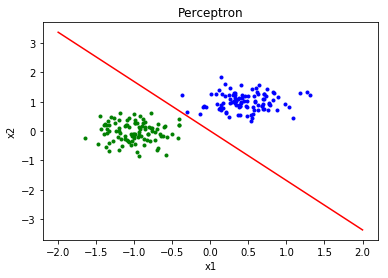

In [6]:
X = inputs
y = targets

ppn = Perceptron_MSE(epochs=15, eta=0.001)

ppn.train(X, y)
print('Weights: %s' % ppn.w_)


plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Misclassifications')
plt.title('Perceptron - Learning rate 0.001')
plt.show()


w0 = ppn.w_[0]
w1 = ppn.w_[1]
w2 = ppn.w_[2]

a = np.linspace(-2,2,1000)
b = (-1/w2)*(w1*a+w0)

plt.plot([p[0] for p in classA], [p[1] for p in classA], 'b.')
plt.plot([p[0] for p in classB], [p[1] for p in classB], 'g.')
plt.plot(a,b,'r-')

plt.title('Perceptron')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

Weights: [0.         0.53558541 0.31784372]


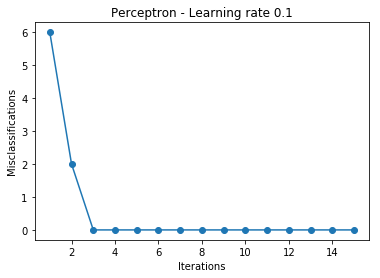

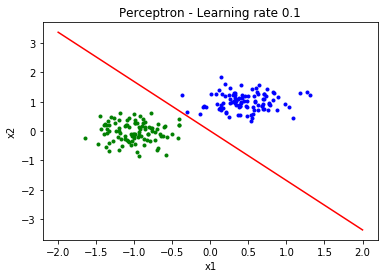

In [7]:
ppn = Perceptron(epochs=15, eta=0.1)

ppn.train(inputs, targets)
print('Weights: %s' % ppn.w_)

plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Misclassifications')
plt.title('Perceptron - Learning rate 0.1')
plt.show()

w0 = ppn.w_[0]
w1 = ppn.w_[1]
w2 = ppn.w_[2]

a = np.linspace(-2,2,1000)
b = (-1/w2)*(w1*a+w0)

plt.plot([p[0] for p in classA], [p[1] for p in classA], 'b.')
plt.plot([p[0] for p in classB], [p[1] for p in classB], 'g.')
plt.plot(a,b,'r-')


plt.title('Perceptron - Learning rate 0.1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

# Delta rule with batch

In [20]:
class AdalineGD(object):

    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.epochs):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

# Delta rule with sequential

In [56]:
class AdalineSGD(object):

    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y, reinitialize_weights=True):

        if reinitialize_weights:
            self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.epochs):
            for xi, target in zip(X, y):
                output = self.net_input(xi)
                error = (target - output)
                self.w_[1:] += self.eta * xi.dot(error)
                self.w_[0] += self.eta * error

            cost = ((y - self.activation(X))**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

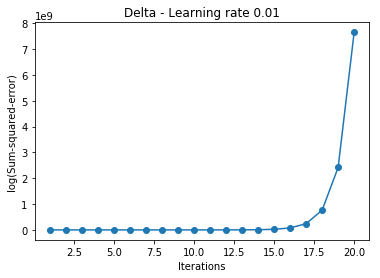

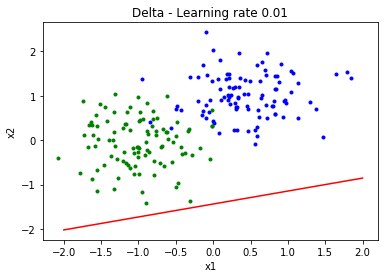

In [21]:
X = inputs
y = targets
ada = AdalineGD(epochs=20, eta=0.01).train(X, y)
plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('log(Sum-squared-error)')
plt.title('Delta - Learning rate 0.01')
plt.show()

w0 = ada.w_[0]
w1 = ada.w_[1]
w2 = ada.w_[2]

a = np.linspace(-2,2,1000)
b = (-1/w2)*(w1*a+w0)

plt.plot([p[0] for p in classA], [p[1] for p in classA], 'b.')
plt.plot([p[0] for p in classB], [p[1] for p in classB], 'g.')
plt.plot(a,b,'r-')

plt.title('Delta - Learning rate 0.01')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

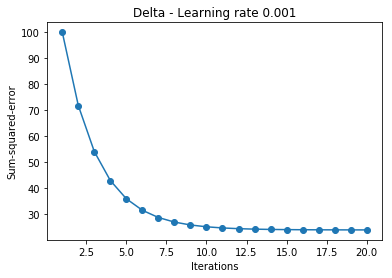

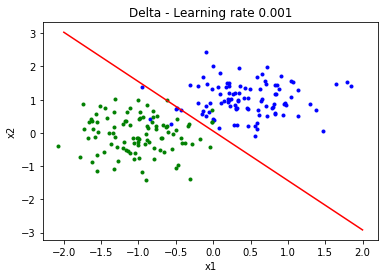

In [22]:
ada = AdalineGD(epochs=20, eta=0.001).train(X, y)
plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Sum-squared-error')
plt.title('Delta - Learning rate 0.001')
plt.show()

w0 = ada.w_[0]
w1 = ada.w_[1]
w2 = ada.w_[2]

a = np.linspace(-2,2,1000)
b = (-1/w2)*(w1*a+w0)

plt.plot([p[0] for p in classA], [p[1] for p in classA], 'b.')
plt.plot([p[0] for p in classB], [p[1] for p in classB], 'g.')
plt.plot(a,b,'r-')

plt.title('Delta - Learning rate 0.001')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

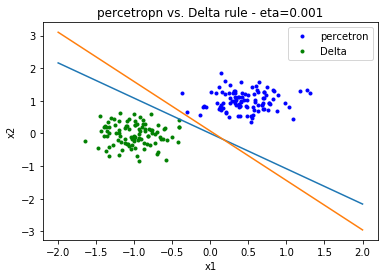

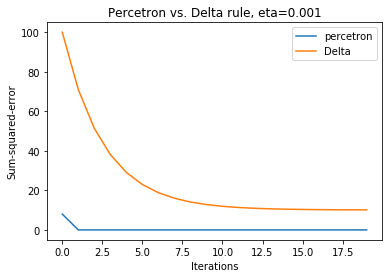

In [99]:
X = inputs
y = targets
ppn = Perceptron_MSE(epochs=20, eta=0.001)
ppn.train(X, y)
ada = AdalineGD(epochs=20, eta=0.001).train(X, y)

v0 = ppn.w_[0]
v1 = ppn.w_[1]
v2 = ppn.w_[2]

a = np.linspace(-2,2,1000)
b = (-1/v2)*(v1*a+v0)

w0 = ada.w_[0]
w1 = ada.w_[1]
w2 = ada.w_[2]

d = (-1/w2)*(w1*a+w0)

plt.plot([p[0] for p in classA], [p[1] for p in classA], 'b.')
plt.plot([p[0] for p in classB], [p[1] for p in classB], 'g.')

plt.plot(a,b,a,d)
plt.title('percetropn vs. Delta rule - eta=0.001')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(("percetron","Delta"))
plt.show()

plt.plot(range(0, len(ppn.errors_)), ppn.errors_, ada.cost_)
plt.title("Percetron vs. Delta rule, eta=0.001")
plt.xlabel('Iterations')
plt.ylabel('Sum-squared-error')
plt.legend(("percetron","Delta"))

[-0.03997314  0.82402663  0.54416393] [-0.03859614  0.81677253  0.54034067]


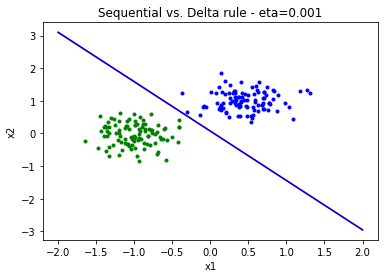

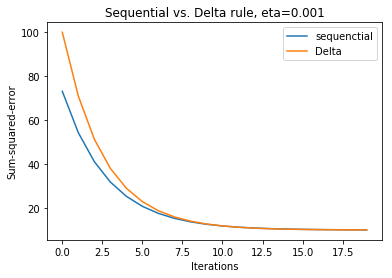

In [98]:
X = inputs
y = targets

ada = AdalineGD(epochs=20, eta=0.001).train(X, y)

agd = AdalineSGD(epochs=20, eta=0.001)
agd.train(X, y)


v0 = agd.w_[0]
v1 = agd.w_[1]
v2 = agd.w_[2]

a = np.linspace(-2,2,1000)
b = (-1/v2)*(v1*a+v0)

w0 = ada.w_[0]
w1 = ada.w_[1]
w2 = ada.w_[2]

d = (-1/w2)*(w1*a+w0)
print(ada.w_,agd.w_)
plt.plot([p[0] for p in classA], [p[1] for p in classA], 'b.')
plt.plot([p[0] for p in classB], [p[1] for p in classB], 'g.')


l1 = plt.plot(a, b,'r')
l2 = plt.plot(a, d,'b')


plt.title('Sequential vs. Delta rule - eta=0.001')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

plt.plot(range(0, len(ppn.errors_)), agd.cost_, ada.cost_)
plt.title("Sequential vs. Delta rule, eta=0.001")
plt.xlabel('Iterations')
plt.ylabel('Sum-squared-error')
plt.legend(("sequenctial","Delta"))

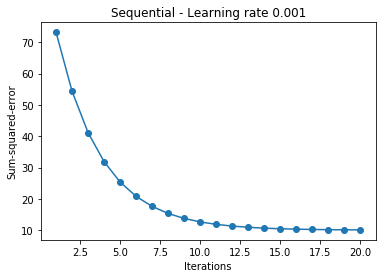

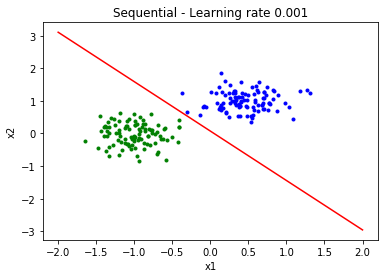

In [12]:
agd = AdalineSGD(epochs=20, eta=0.001)
agd.train(X, y)
plt.plot(range(1, len(agd.cost_)+1), agd.cost_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Sum-squared-error')
plt.title('Sequential - Learning rate 0.001')
plt.show()

w0 = agd.w_[0]
w1 = agd.w_[1]
w2 = agd.w_[2]

a = np.linspace(-2,2,1000)
b = (-1/w2)*(w1*a+w0)

plt.plot([p[0] for p in classA], [p[1] for p in classA], 'b.')
plt.plot([p[0] for p in classB], [p[1] for p in classB], 'g.')
plt.plot(a,b,'r-')

plt.title('Sequential - Learning rate 0.001')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

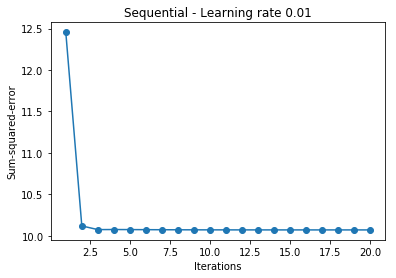

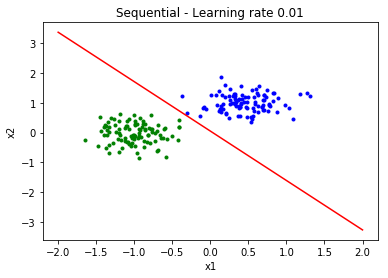

In [13]:
agd = AdalineSGD(epochs=20, eta=0.01)
agd.train(X, y)
plt.plot(range(1, len(agd.cost_)+1), agd.cost_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Sum-squared-error')
plt.title('Sequential - Learning rate 0.01')
plt.show()

w0 = agd.w_[0]
w1 = agd.w_[1]
w2 = agd.w_[2]

a = np.linspace(-2,2,1000)
b = (-1/w2)*(w1*a+w0)

plt.plot([p[0] for p in classA], [p[1] for p in classA], 'b.')
plt.plot([p[0] for p in classB], [p[1] for p in classB], 'g.')
plt.plot(a,b,'r-')

plt.title('Sequential - Learning rate 0.01')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

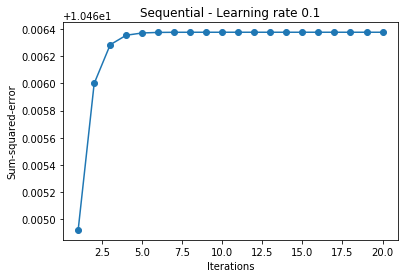

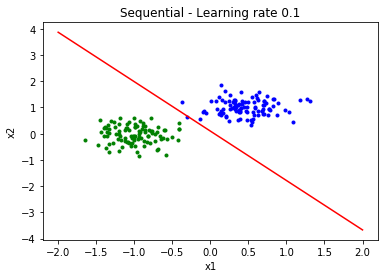

In [14]:
agd= AdalineSGD(epochs=20, eta=0.1)
agd.train(X, y)
plt.plot(range(1, len(agd.cost_)+1), agd.cost_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Sum-squared-error')
plt.title('Sequential - Learning rate 0.1')
plt.show()

w0 = agd.w_[0]
w1 = agd.w_[1]
w2 = agd.w_[2]

a = np.linspace(-2,2,1000)
b = (-1/w2)*(w1*a+w0)

plt.plot([p[0] for p in classA], [p[1] for p in classA], 'b.')
plt.plot([p[0] for p in classB], [p[1] for p in classB], 'g.')
plt.plot(a,b,'r-')

plt.title('Sequential - Learning rate 0.1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [15]:
class delta_no_bias(object):

    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):

        self.w_ = np.zeros(X.shape[1])
        self.cost_ = []

        for i in range(self.epochs):
            output = self.net_input(X)
            errors = (y - output)
            self.w_ += self.eta * X.T.dot(errors)
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_) 

    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

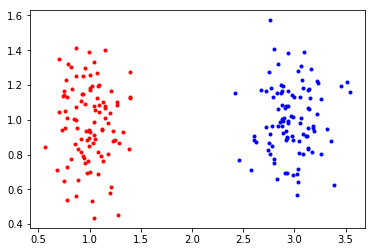

In [53]:
np.random.seed(1000)

mA = [3, 1]
mB = [1, 1]

sigmaA = 0.2
sigmaB = 0.2

classA = np.concatenate(
(np.random.randn(50, 2)*sigmaA + mA,
 np.random.randn(50, 2)*sigmaA + mA))

classB = np.concatenate(
(np.random.randn(50, 2)*sigmaB + mB,
 np.random.randn(50, 2)*sigmaB + mB))

inputs = np.concatenate((classA, classB))

targets = np.concatenate((np.ones(classA.shape[0],dtype = int), -np.ones(classB.shape[0],dtype = int)))

N = inputs.shape[0]

permute = list(range(N))

random.shuffle(permute)

inputs = inputs[permute, :]

targets = targets[permute]

plt.plot([p[0] for p in classA], [p[1] for p in classA], 'b.')
plt.plot([p[0] for p in classB], [p[1] for p in classB], 'r.')

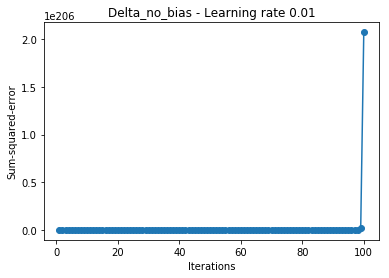

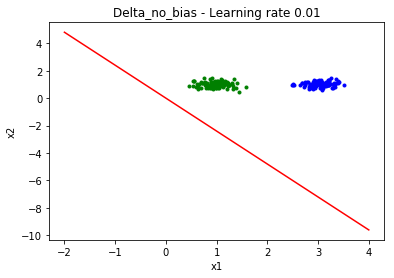

In [17]:
X = inputs
y = targets
dnb = delta_no_bias(epochs=100, eta=0.01).train(X, y)
plt.plot(range(1, len(dnb.cost_)+1), dnb.cost_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Sum-squared-error')
plt.title('Delta_no_bias - Learning rate 0.01')
plt.show()


w1 = dnb.w_[0]
w2 = dnb.w_[1]

a = np.linspace(-2,4,1000)
b = (-1/w2)*(w1*a)

plt.plot([p[0] for p in classA], [p[1] for p in classA], 'b.')
plt.plot([p[0] for p in classB], [p[1] for p in classB], 'g.')
plt.plot(a,b,'r-')

plt.title('Delta_no_bias - Learning rate 0.01')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

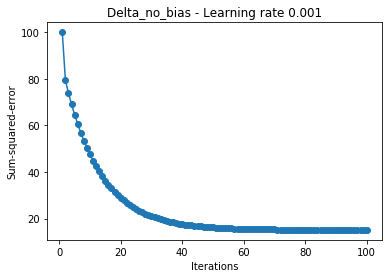

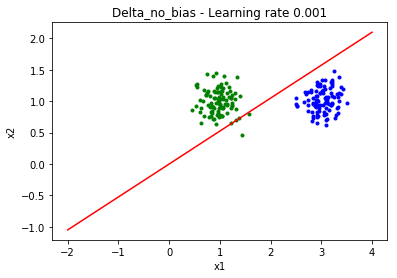

In [18]:

dnb = delta_no_bias(epochs=100, eta=0.001).train(X, y)
plt.plot(range(1, len(dnb.cost_)+1), dnb.cost_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Sum-squared-error')
plt.title('Delta_no_bias - Learning rate 0.001')
plt.show()

w1 = dnb.w_[0]
w2 = dnb.w_[1]

a = np.linspace(-2,4,1000)
b = (-1/w2)*(w1*a)

plt.plot([p[0] for p in classA], [p[1] for p in classA], 'b.')
plt.plot([p[0] for p in classB], [p[1] for p in classB], 'g.')
plt.plot(a,b,'r-')

plt.title('Delta_no_bias - Learning rate 0.001')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [19]:
## new data generation

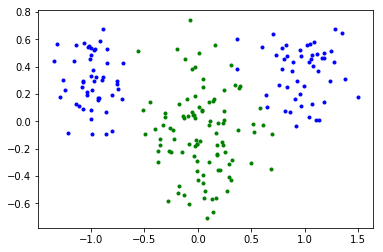

In [20]:
p = 2
ndata = 100
classA = np.zeros((p,ndata))
classB = np.zeros((p,ndata))

mA = [1, 0.3]
mB = [0.0, -0.1]

sigmaA = 0.2
sigmaB = 0.3

classA[0] = np.concatenate((np.random.randn(1,int(0.5*ndata))*sigmaA-mA[0],np.random.randn(1,int(0.5*ndata))*sigmaA+mA[0]),axis=1)
classB[0] = np.random.randn(1,ndata)*sigmaB +mB[0]
classA[1] = np.random.randn(1,ndata)*sigmaA +mA[1]
classB[1] = np.random.randn(1,ndata)*sigmaB +mB[1]

classA = classA.T
classB = classB.T

np.random.shuffle(classA)
np.random.shuffle(classB)

inputs = np.concatenate((classA, classB))

targets = np.concatenate((np.ones(classA.shape[0],dtype = int), -np.ones(classB.shape[0],dtype = int)))

N = inputs.shape[0]

permute = list(range(N))

random.shuffle(permute)

inputs = inputs[permute, :]

targets = targets[permute]

plt.plot([p[0] for p in classA], [p[1] for p in classA], 'b.')
plt.plot([p[0] for p in classB], [p[1] for p in classB], 'g.')

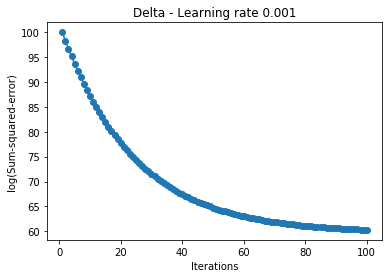

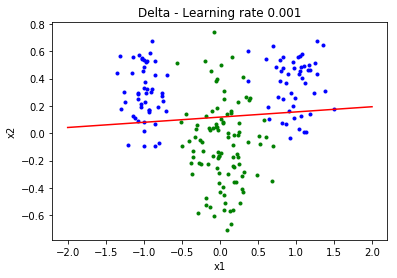

In [21]:
X = inputs
y = targets
ada = AdalineGD(epochs=100, eta=0.001).train(X, y)
plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('log(Sum-squared-error)')
plt.title('Delta - Learning rate 0.001')
plt.show()

w0 = ada.w_[0]
w1 = ada.w_[1]
w2 = ada.w_[2]

a = np.linspace(-2,2,1000)
b = (-1/w2)*(w1*a+w0)

plt.plot([p[0] for p in classA], [p[1] for p in classA], 'b.')
plt.plot([p[0] for p in classB], [p[1] for p in classB], 'g.')
plt.plot(a,b,'r-')

plt.title('Delta - Learning rate 0.001')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [22]:
## random 25% removed

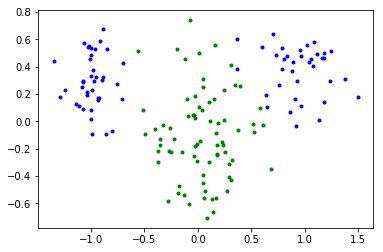

In [23]:
classA_75 = classA[:int(0.75*ndata),:]
classB_75 = classB[:int(0.75*ndata),:]

inputs = np.concatenate((classA_75, classB_75))

targets = np.concatenate((np.ones(classA_75.shape[0],dtype = int), -np.ones(classB_75.shape[0],dtype = int)))

N = inputs.shape[0]

permute = list(range(N))

random.shuffle(permute)

inputs = inputs[permute, :]

targets = targets[permute]

plt.plot([p[0] for p in classA_75], [p[1] for p in classA_75], 'b.')
plt.plot([p[0] for p in classB_75], [p[1] for p in classB_75], 'g.')

In [24]:
inputs.shape

(150, 2)

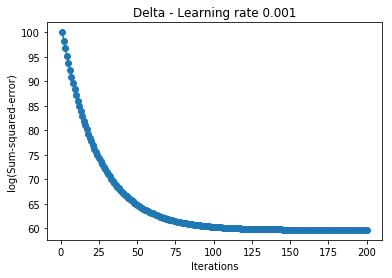

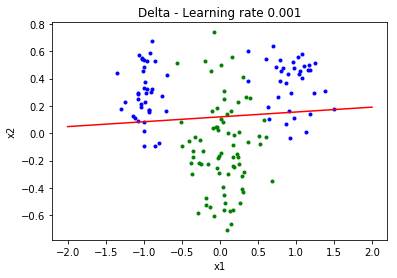

In [25]:
ada = AdalineGD(epochs=200, eta=0.001).train(X, y)
plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('log(Sum-squared-error)')
plt.title('Delta - Learning rate 0.001')
plt.show()

w0 = ada.w_[0]
w1 = ada.w_[1]
w2 = ada.w_[2]

a = np.linspace(-2,2,1000)
b = (-1/w2)*(w1*a+w0)

plt.plot([p[0] for p in classA_75], [p[1] for p in classA_75], 'b.')
plt.plot([p[0] for p in classB_75], [p[1] for p in classB_75], 'g.')
plt.plot(a,b,'r-')

plt.title('Delta - Learning rate 0.001')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [26]:
## random 50% from classA removed

In [27]:
classA_50 = classA[:int(0.5*ndata),:]
classB = classB 

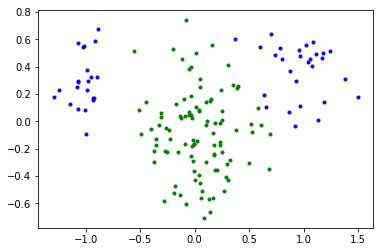

In [28]:
inputs = np.concatenate((classA_50, classB))

targets = np.concatenate((np.ones(classA_50.shape[0],dtype = int), -np.ones(classB.shape[0],dtype = int)))

N = inputs.shape[0]

permute = list(range(N))

random.shuffle(permute)

inputs = inputs[permute, :]

targets = targets[permute]

plt.plot([p[0] for p in classA_50], [p[1] for p in classA_50], 'b.')
plt.plot([p[0] for p in classB], [p[1] for p in classB], 'g.')

In [29]:
inputs.shape

(150, 2)

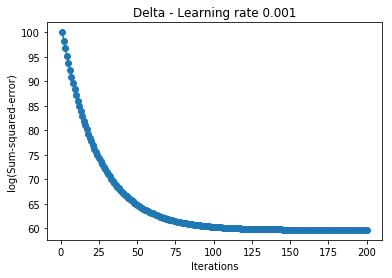

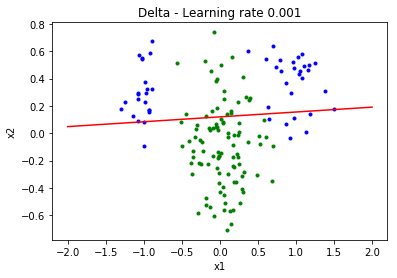

In [30]:
ada = AdalineGD(epochs=200, eta=0.001).train(X, y)
plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('log(Sum-squared-error)')
plt.title('Delta - Learning rate 0.001')
plt.show()

w0 = ada.w_[0]
w1 = ada.w_[1]
w2 = ada.w_[2]

a = np.linspace(-2,2,1000)
b = (-1/w2)*(w1*a+w0)

plt.plot([p[0] for p in classA_50], [p[1] for p in classA_50], 'b.')
plt.plot([p[0] for p in classB], [p[1] for p in classB], 'g.')
plt.plot(a,b,'r-')

plt.title('Delta - Learning rate 0.001')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [31]:
## random 50% from classB removed

In [32]:
classA = classA
classB_50 = classB[:int(0.5*ndata),:]

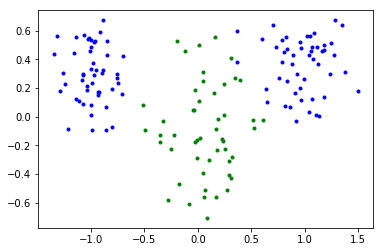

In [33]:
inputs = np.concatenate((classA, classB_50))

targets = np.concatenate((np.ones(classA.shape[0],dtype = int), -np.ones(classB_50.shape[0],dtype = int)))

N = inputs.shape[0]

permute = list(range(N))

random.shuffle(permute)

inputs = inputs[permute, :]

targets = targets[permute]

plt.plot([p[0] for p in classA], [p[1] for p in classA], 'b.')
plt.plot([p[0] for p in classB_50], [p[1] for p in classB_50], 'g.')

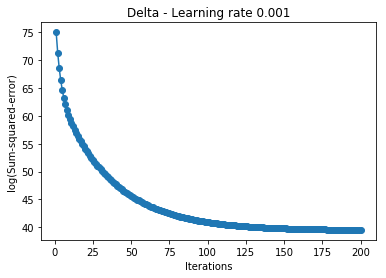

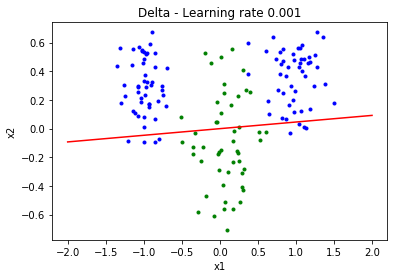

In [34]:
X = inputs
y = targets
ada = AdalineGD(epochs=200, eta=0.001).train(X, y)
plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('log(Sum-squared-error)')
plt.title('Delta - Learning rate 0.001')
plt.show()

w0 = ada.w_[0]
w1 = ada.w_[1]
w2 = ada.w_[2]

a = np.linspace(-2,2,1000)
b = (-1/w2)*(w1*a+w0)

plt.plot([p[0] for p in classA], [p[1] for p in classA], 'b.')
plt.plot([p[0] for p in classB_50], [p[1] for p in classB_50], 'g.')
plt.plot(a,b,'r-')

plt.title('Delta - Learning rate 0.001')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [35]:
## random 20% from NEGATIVE classA and 80% positive classA removed

In [36]:
pos = [classA[i, :] for i in range(100) if classA[i,0]>0]
neg = [classA[j, :] for j in range(100) if classA[j,0]<0]
pos = np.array(pos)
neg = np.array(neg)
classA_20 = pos[:int(0.2*len(pos))]
classA_80 = neg[:int(0.8*len(neg))]


In [37]:
classA = np.concatenate((classA_20, classA_80))
classA.shape

(50, 2)

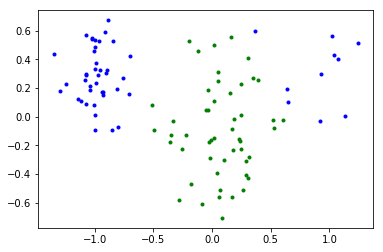

In [38]:
inputs = np.concatenate((classA, classB))

targets = np.concatenate((np.ones(classA.shape[0],dtype = int), -np.ones(classB.shape[0],dtype = int)))

N = inputs.shape[0]

permute = list(range(N))

random.shuffle(permute)

inputs = inputs[permute, :]

targets = targets[permute]

plt.plot([p[0] for p in classA], [p[1] for p in classA], 'b.')
plt.plot([p[0] for p in classB_50], [p[1] for p in classB_50], 'g.')


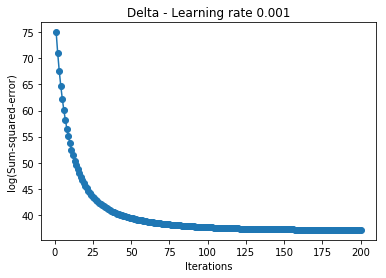

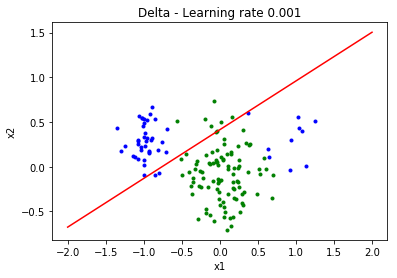

In [39]:
X = inputs
y = targets
ada = AdalineGD(epochs=200, eta=0.001).train(X, y)
plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('log(Sum-squared-error)')
plt.title('Delta - Learning rate 0.001')
plt.show()

w0 = ada.w_[0]
w1 = ada.w_[1]
w2 = ada.w_[2]

a = np.linspace(-2,2,1000)
b = (-1/w2)*(w1*a+w0)

plt.plot([p[0] for p in classA], [p[1] for p in classA], 'b.')
plt.plot([p[0] for p in classB], [p[1] for p in classB], 'g.')
plt.plot(a,b,'r-')

plt.title('Delta - Learning rate 0.001')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()